## 한글폰트

In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [34]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
matplotlib.font_manager._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


FileNotFoundError: ignored

In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 18.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Step 0 데이터 수집 : Yahoo Finance 데이터 불러오기

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf

soil_df = yf.download('010950.KS',
                      start='2021-05-05',
                      end='2021-11-05',
                      progress=False)

soil_df = soil_df[["Close"]]

soil_df = soil_df.reset_index()

soil_df.columns = ['day', 'price']

soil_df['day'] = pd.to_datetime(soil_df['day'])

soil_df.index = soil_df['day']
soil_df.set_index('day', inplace=True)

soil_df

,price
day,
2021-05-06,95500.0
2021-05-07,94400.0
2021-05-10,96500.0
2021-05-11,98100.0
2021-05-12,96700.0
...,...
2021-11-01,101500.0
2021-11-02,102500.0
2021-11-03,100000.0


## Step 1 탐색 : 시간정보가 포함된 데이터 살펴보기

In [22]:
soil_train_df = soil_df[:120]
soil_train_df

,price
day,
2021-05-06,95500.0
2021-05-07,94400.0
2021-05-10,96500.0
2021-05-11,98100.0
2021-05-12,96700.0
...,...
2021-10-25,107000.0
2021-10-26,105500.0
2021-10-27,106500.0


In [23]:
soil_test_df = soil_df[120:]
soil_test_df

,price
day,
2021-11-01,101500.0
2021-11-02,102500.0
2021-11-03,100000.0
2021-11-04,99300.0
2021-11-05,100500.0


### 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)


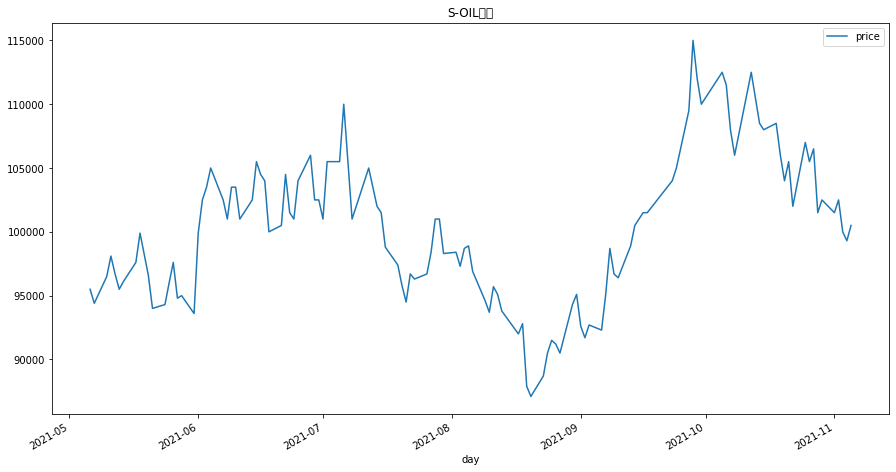

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
soil_df.plot(ax=ax)

plt.title("S-OIL주가")
plt.show()

## Step 2 예측 : 파이썬 라이브러리를 활용한 시세 예측

### Model 1 : ARIMA

In [ ]:
pip install statsmodels==0.11.1 # 버전 다운그레이드 (0.11.1)

     |████████████████████████████████| 8.7 MB 721 kB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# AR, 차분, MA 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(soil_train_df.price.values, order = (1, 1, 1))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
# model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1092.402
Method:                       css-mle   S.D. of innovations           2346.660
Date:                Mon, 29 Nov 2021   AIC                           2190.804
Time:                        02:26:56   BIC                           2199.141
Sample:                             1   HQIC                          2194.189
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.5034      0.243      2.068      0.039       0.026       0.980
ma.L1.D.y     -0.6352      0.210     -3.025      0.002      -1.047      -0.224
                                    Roots           

In [ ]:
#방법 2. auto_arima 함수로 자동 추출
from pmdarima import auto_arima
stepwise_model = auto_arima(soil_train_df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=2139.573, Time=0.62 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2145.741, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2147.807, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2147.566, Time=0.17 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=2149.561, Time=0.68 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=2149.786, Time=0.42 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=2139.505, Time=1.28 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=2148.454, Time=1.23 sec
 ARIMA(1,1,1)(2,1,2)[7]             : AIC=2140.529, Time=2.49 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=2139.731, Time=1.32 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=2137.869, Time=0.79 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=2137.905, Time=0.36 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2146.544, Time=0.53 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=2138.908, Time=1.62 sec
 ARIMA(0,1,1)(1,1,0)[7]          

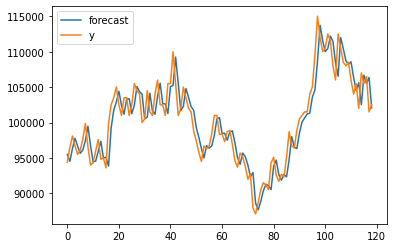

In [ ]:
# 학습 데이터에 대한 예측 결과

fig = model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

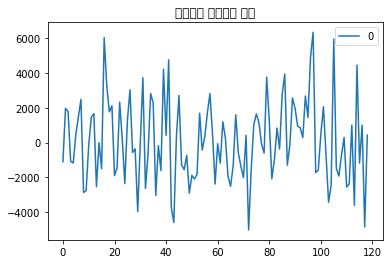

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [ ]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([102732.70439441, 102849.84218569, 102908.80653048, 102938.48776246,
        102953.42858026]),
 array([2346.65980322, 3107.57267641, 3632.73807047, 4055.57114338,
        4422.41484711]),
 array([[ 98133.33569612, 107332.07309269],
        [ 96759.1116606 , 108940.57271079],
        [ 95788.7707471 , 110028.84231387],
        [ 94989.71438471, 110887.26114022],
        [ 94285.65475523, 111621.20240528]]))

In [ ]:
# 마지막 5일의 예측 데이터
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터
test_y = soil_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

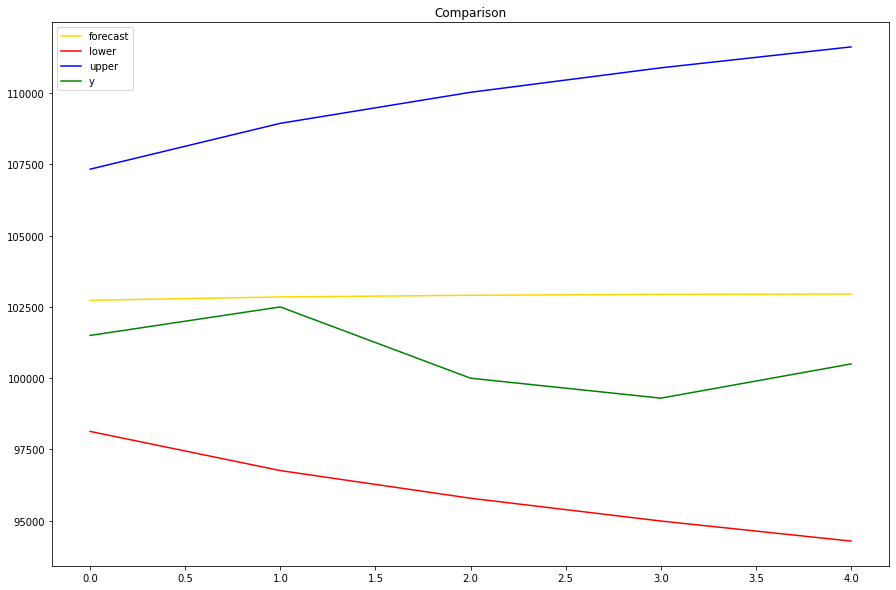

In [ ]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['forecast', 'lower','upper','y'])
plt.title("Comparison")
plt.show()

In [ ]:
print("난수: ", pred_arima_y)

print("실제 데이터: ", test_y)

난수:  [102732.70439440932, 102849.84218569171, 102908.80653048352, 102938.48776246393, 102953.42858025791]
실제 데이터:  [101500. 102500. 100000.  99300. 100500.]


In [ ]:
print("최대값", pred_y_upper)
print("최소값", pred_y_lower)

최대값 [107332.07309269447, 108940.57271078724, 110028.84231386632, 110887.26114022167, 111621.20240528493]
최소값 [98133.33569612417, 96759.11166059619, 95788.77074710072, 94989.7143847062, 94285.65475523089]


### Model 2: Facebook Prophet

In [ ]:
from fbprophet import Prophet


soil_df = soil_df.reset_index()

soil_df.columns = ['ds', 'y']

soil_train_df = soil_df[:120]
soil_test_df = soil_df[120:]

In [ ]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=False,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(soil_train_df)

In [ ]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
120,2021-10-30,102262.353487,100218.281872,104482.193200
121,2021-10-31,101316.244465,99052.203089,103609.802269
122,2021-11-01,100172.786840,97662.783341,102540.430206
123,2021-11-02,98812.126767,96191.406781,101318.524408
124,2021-11-03,97217.569033,94433.694992,99942.712156


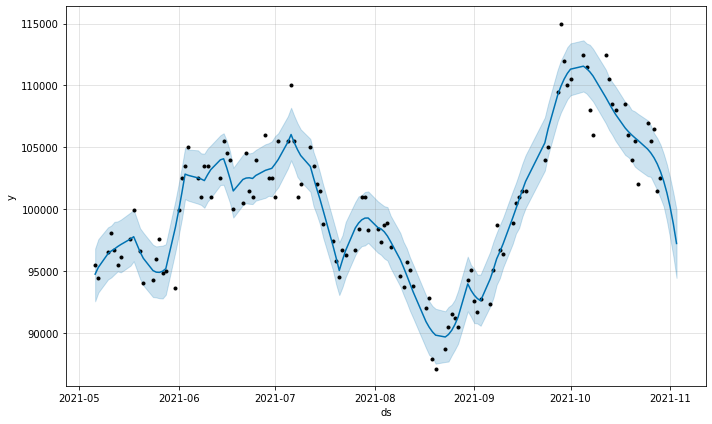

In [ ]:
fig1 = prophet.plot(forecast_data)

# 검은 점 : 실제 가격.
# 파란 선 : 예측 가격.

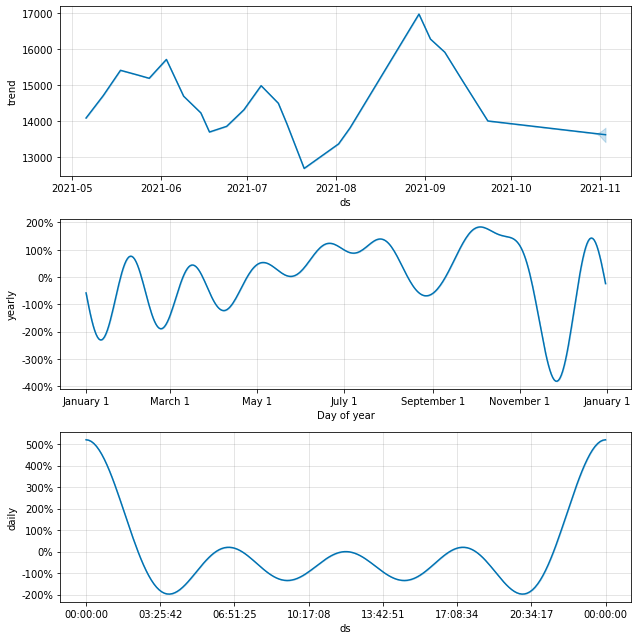

In [ ]:
# 트렌드 정보 시각화 그래프.
fig2 = prophet.plot_components(forecast_data)

Text(0.5, 1.0, 'Comparison')

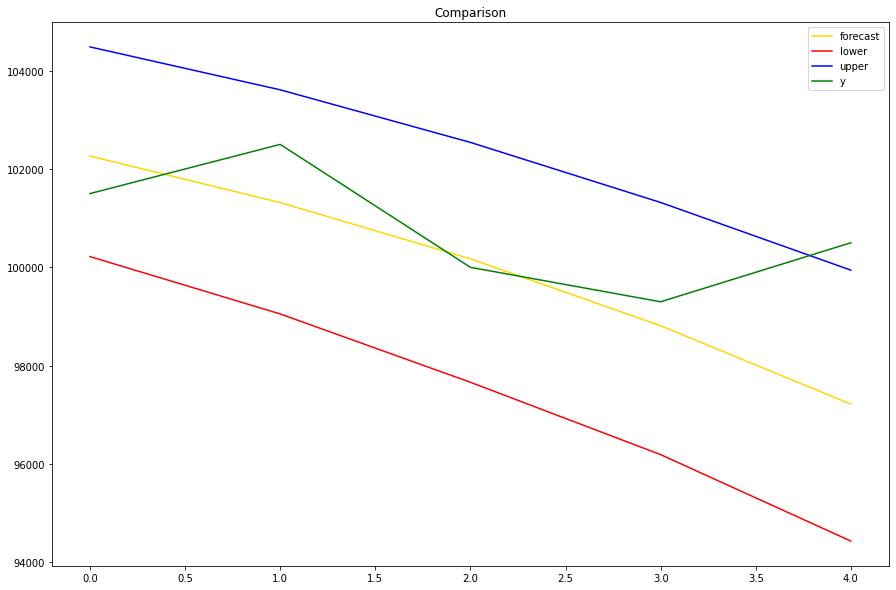

In [ ]:
# Testset 평가
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터
test_y = soil_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['forecast', 'lower','upper','y'])
plt.title("Comparison")

In [ ]:
print(pred_y_lower)
print(pred_y_upper)

[100120.84783056  99134.98282947  97810.27892103  96084.13200557
  94293.71007508]
[104472.41877389 103556.26533633 102669.60264813 101569.47239217
 100606.3978887 ]


## Step 3 활용 : 더 나은 결과를 위한 방법

### 첫 번째 : 상한값, 하한값을 지정.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



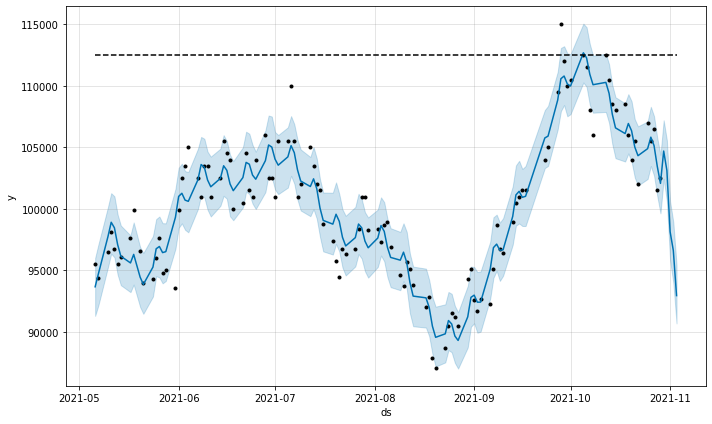

In [ ]:
# 상한가 설정
soil_train_df['cap'] = 112500

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(soil_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 112500
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

### 두 번째 : 이상치 제거

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



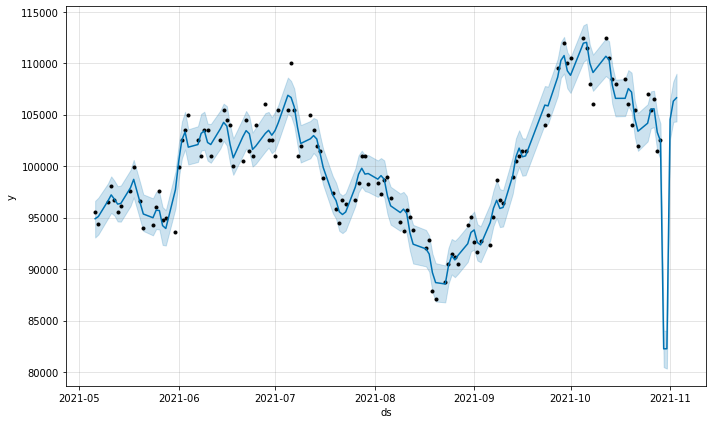

In [ ]:
soil_train_df.loc[soil_train_df['y'] > 112500, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(soil_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [ ]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]

## Step 4 : Model 평가

### RMSE (Root Mean Square Error, 평균 제곱근 오차)

In [ ]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   'FBprophet 이상치 제거 후(112500) 예측값':pred_fbprophet_y_1,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,FBprophet 이상치 제거 후(112500) 예측값,실제값
0,102732.704394,102262.353487,102262.353487,101500.0
1,102849.842186,101316.244465,101316.244465,102500.0
2,102908.806530,100172.786840,100172.786840,100000.0
3,102938.487762,98812.126767,98812.126767,99300.0
4,102953.428580,97217.569033,97217.569033,100500.0


In [ ]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,실제값
0,102732.704394,102262.353487,101500.0
1,102849.842186,101316.244465,102500.0
2,102908.806530,100172.786840,100000.0
3,102938.487762,98812.126767,99300.0
4,102953.428580,97217.569033,100500.0


Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

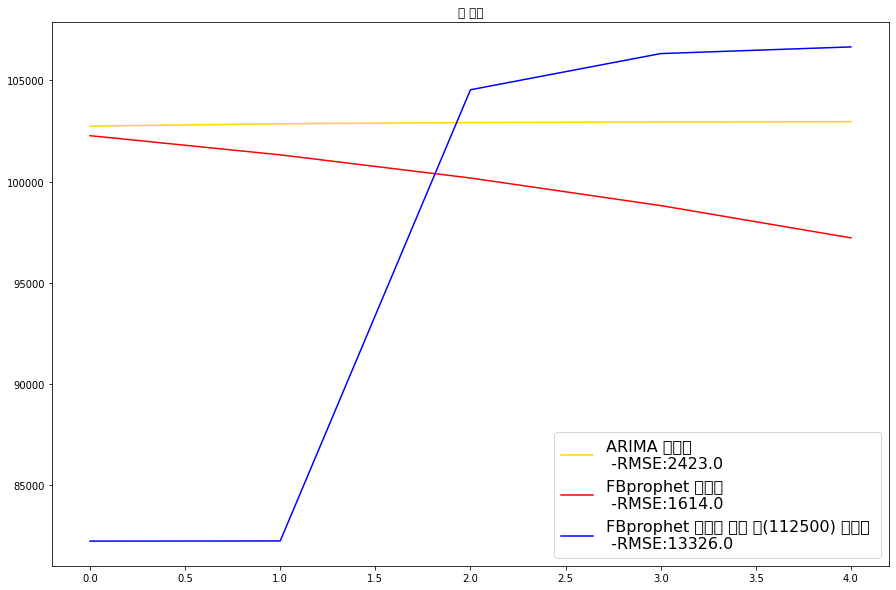

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의  rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(df[['FBprophet 이상치 제거 후(112500) 예측값']], color = 'blue')

# 실제 가격 그래프
# plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'FBprophet 이상치 제거 후(112500) 예측값 \n -RMSE:' + str(round(rmse_fbprophet_1,0))])
plt.title("값 비교")

Text(0.5, 1.0, 'Loss Comparison')

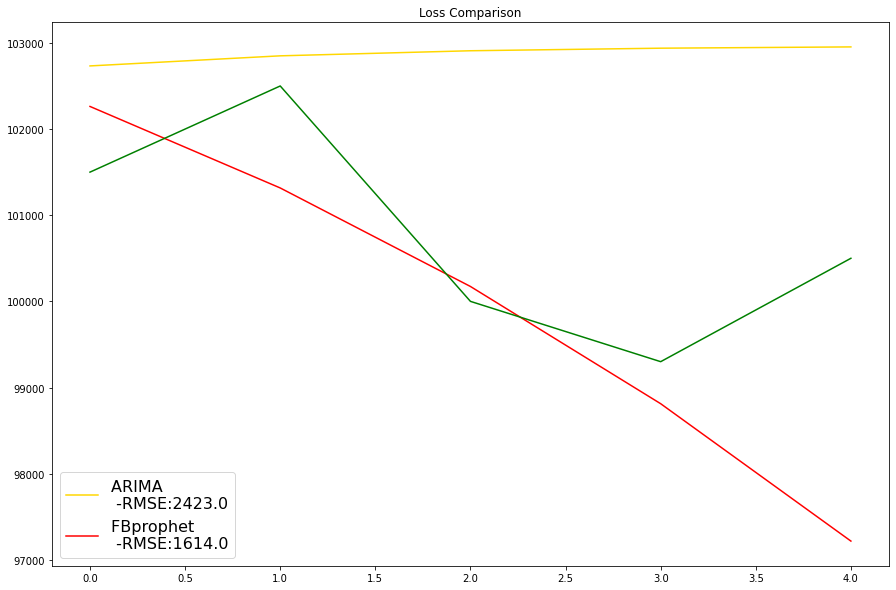

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의  rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("Loss Comparison")